# 线性回归算法  

* 解决回归问题  
* 结果具有很好的可解释性  
* 实现容易  
* 具备机器学习很多重要思想

<img src="resource/线性回归.png">  

```思想```：  

寻找一条直线，最大程度的“拟合（fit）”样本特征和样本标签之间的关系。  

```注意```：  

这个图和分类问题中的图有区别。横坐标是唯一的特征，纵坐标是样本的标签（Label）。例如房屋面积和房屋的成交价格。因为回归问题中，样本的标签是连续的值，不是简单的有限个可能的类别，只需要用不同的颜色标记就行。回归问题中，样本的标签必须占用一个坐标轴来表示自己的连续值。如果我们想看两个特征值的回归问题，就需要在三维空间中观察。

### 简单线性回归：一元线性回归  

样本特征只有一个。

<img src='resource/线性回归图.png' style="zoom:50%">

* 假设最佳拟合的直线方程为：  
$$y = ax + b$$  

* 对于每一个样本点 $x^{(i)}$，根据直线方程的预测值为：  
$$\hat{y}^{(i)} = ax^{(i)}+b$$  

* 希望预测值和实际值之间的差距尽可能小，如何表达差距？  
$$y^{(i)}-\hat{y}^{(i)}$$  

$$|y^{(i)}-\hat{y}^{(i)}|$$  

$$(y^{(i)}-\hat{y}^{(i)})^{2}$$ 


直接的差值容易导致正负抵消；带有绝对值的差值函数不一定处处可导；因此选择第三种方法来描述差值。所有数据的平方和误差为：  
$$\Sigma_{i=1}^{m}(y^{(i)}-\hat{y}^{(i)})^{2}$$   
m:数据集的样本数量

* 优化目标：  
使得 $\Sigma_{i=1}^{m}(y^{(i)}-\hat{y}^{(i)})^{2}$ 尽可能小。  

>即找到一组$a$和$b$，使得 $\Sigma_{i=1}^{m}(y^{(i)}-ax^{(i)}-b)^{2}$ 尽可能小。

我们称$\Sigma_{i=1}^{m}(y^{(i)}-ax^{(i)}-b)^{2}$为**损失函数**（loss function）,即用于度量模型没有拟合样本的程度。  

**机器学习的基本思路：**  

```step1```. 通过分析问题，确定问题的损失函数；  

```step2```. 通过最优化损失函数，获得机器学习的模型。（学到使得损失函数最小的参数值）  

几乎所有的机器学习算法都是这样的思路，但是它们的区别在于优化原理不同。

### 多元线性回归

<img src="resource/多元线性回归.png">

* 优化目标：  

找到 $\theta_{0},\theta_{1},\theta_{2}...\theta_{n},使得\Sigma_{i=1}^{m}(y^{(i)}-\hat{y}^{(i)})^{2}$尽可能小  

<img src='resource/多元线性回归矩阵表示.png'>  

$$\hat{y} = X_{b}·\theta$$  

$X_{b}$ 是样本矩阵，第一列增加的是全1列向量，为了和$\theta_{0}$构成常数项。  
$\theta$ 是系数矩阵，表示每一个样本特征的权重。  
$\hat{y}$ 是一个向量，表示每一个样本最终预测到的值。

## 使用 Scikit-learn 进行线性回归

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [4]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

        0 - CRIM     城镇的人均犯罪率   
        1 - ZN       住宅用地超过 25,000平方英尺 的比例
        2 - INDUS    城镇非零售商用土地的比例 
        3 - CHAS     查理斯河空变量（如果边界是河流，则为1；否则为0）
        4 - NOX      一氧化氮浓度(千万分之一) 
        5 - RM       每个住宅的平均房间数
        6 - AGE      1940年以前建造的自住单位比例 
        7 - DIS      到波士顿五个中心区域的加权距离  
        8 - RAD      辐射性公路的接近指数。
        9 - TAX      每 10000 美元的全值财产税率。
        10 - PTRATIO  城镇师生比例
        11 - B        1000(Bk - 0.63)^2其中Bk是城镇黑人的比例  
        12 - LSTAT    人口中地位低下者的比例
        13 - MEDV     自住房的平均房价，以千美元计 


In [8]:
X = boston.data
y = boston.target

查看第某个特征与标签的关系。

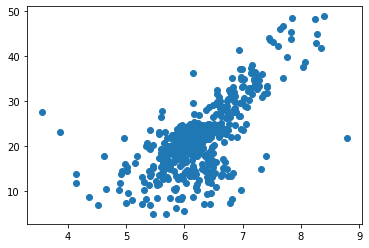

In [23]:
feature_id = 5
plt.scatter(X[:,feature_id],y)

注意到图里最上层有一排房间价格为50的数据，采集数据的时候可能由于计量标准的缘故，或者问卷调查时50和50以上的房子属于同一项，所有房产价格大于50的都被定为50。

In [11]:
X = X[y < 50]
y = y[y < 50]

X.shape

(490, 13)

In [12]:
y.shape

(490,)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=666)
X_train.shape

(367, 13)

In [14]:
from sklearn.linear_model import LinearRegression  

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = lin_reg.predict(X_test)
y_pred

array([18.0674832 , 25.38965364, 12.93779936, 32.9068425 , 24.45259285,
        2.3035171 , 26.63711744, 31.6091074 , 14.05161887, 24.5200248 ,
       14.80099915, 10.56883566, 30.04486713, 16.39641207, 23.89514927,
       25.39090678, 18.85726816, 23.87410663, 28.78593566, 27.02102373,
       12.82233874, 27.00779446, 26.1450563 , 22.85670482, 20.90397175,
       32.05593449, 14.81505015, 20.40733243, 12.92773681, 30.1533454 ,
       35.55450677,  5.22853278, 13.15673352, 35.86864403, 16.05439767,
       21.28027929, 12.59195996, 29.36163103, 27.48027943, 23.99917107,
       14.18301363, 23.43618315, 11.16599462, 22.31031056, 18.58668285,
       16.46589493, 24.9445317 , 33.28965293, 19.11361467, 27.21927793,
       18.07979492, 14.98324631, 25.22125847, 16.21827623, 21.65640339,
       16.23226855, 24.06823531, 11.77168692, 27.93502896, 30.83956407,
       19.71205279, 24.79388556, 25.89249735, 12.24815028, 16.75095143,
       27.24953329, 22.47677908, 22.16879287, 31.48493081, 14.05

In [25]:
lin_reg.coef_ # 权重系数

array([-1.15625837e-01,  3.13179564e-02, -4.35662825e-02, -9.73281610e-02,
       -1.09500653e+01,  3.49898935e+00, -1.41780625e-02, -1.06249020e+00,
        2.46031503e-01, -1.23291876e-02, -8.79440522e-01,  8.31653623e-03,
       -3.98593455e-01])

In [16]:
lin_reg.intercept_ # 常数项

32.59756158869972

## 评价回归算法结果的指标

### 1.  MSE

In [29]:
mse_test = np.sum((y_pred - y_test)**2)/y_test.shape[0]
mse_test

13.009029984784977

### 2. RMSE  

量纲和y相同。

In [30]:
rmse_test = np.sqrt(mse_test)
rmse_test

3.606803291667703

对于分类问题，它的准确度可以直接拿“分到正确的类/所有分类结果”来衡量；但是对于回归，比如进行房价预测，我们得到回归的RMSE为5万，进行学生分数预测，得到的回归RMSE为10分，此时如何衡量哪一个回归结果更准确？以上两种指标都不能解决这个问题。

### 3. R-Squared 又称 R-方

$$R^{2} = 1 - \frac{SS_{residual}}{SS_{total}} $$  

* $SS_{residual}$ : Residual Sum of Squares
* $SS_{total}$: Total Sum of Squares  

$$R^{2} = 1 - \frac{\Sigma_{i}(\hat{y}^{(i)}-y^{(i)})^{2}}{\Sigma_{i}(\overline{y}-y^{(i)})^{2}} $$  

* $\Sigma_{i}(\hat{y}^{(i)}-y^{(i)})^{2}$:使用我们的模型预测产生的错误  
* $\Sigma_{i}(\overline{y}-y^{(i)})^{2}$: 使用 $y = \overline{y}$ 预测产生的错误——baseline model （基准模型）

```说明```：

* $R^{2} <= 1$ 
* $R^{2}$ 越大越好。当我们的预测模型没有任何错误时，$R^{2}$ 得到的最大值为1；  
* 当我们的模型等于基准模型时，$R^{2}$ 为0；  
* $R^{2} < 0$时，说明我们学习到的模型还不如基准模型。此时很有可能是数据本身不存在任何线性关系。

In [31]:
lin_reg.score(X_test, y_test)

0.8009390227581029

### KNN 解决回归问题

In [18]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)
knn_regressor.score(X_test, y_test)

0.602674505080953

In [19]:
param_grid = [{
                 "weights":['uniform',"distance"],
                 "n_neighbors":[i for i in range(2,11)],
                 "p":[i for i in range(1,6)]
              }]

In [45]:
knn_reg = KNeighborsRegressor()


In [46]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(knn_reg, param_grid,n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5],
                          'weights': ['uniform', 'distance']}])

In [47]:
grid_search.best_estimator_.score(X_test, y_test)

0.7353138117643773

In [48]:
grid_search.best_params_

{'n_neighbors': 6, 'p': 1, 'weights': 'distance'}

In [49]:
grid_search.best_estimator_.score(X_test, y_test)

0.7353138117643773